The goal of this article is to provide an easy introduction to stock market analysis using Python. In this notebook we will use pandas_datareader module. We will walk through a simple Python script to retrieve, analyze, and visualize data from different markets. 

# Project Setup

Once we've got a blank Jupyter notebook open, the first thing we'll do is import the required dependencies.

In [22]:
import pandas as pd
from datetime import datetime, timedelta

We will use <a href="https://pydata.github.io/pandas-datareader/stable/index.html">pandas_datareader</a> to get data from the market.

In [23]:
import pandas_datareader as pdr

Making the same request repeatedly can use a lot of bandwidth, slow down your code and may result in your IP being banned.

pandas_datareader allows you to cache queries using requests_cache

In [24]:
import requests_cache
expire_after = timedelta(days=1)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)

In [25]:
%reload_ext watermark
%watermark -v -m --iversions

requests_cache0.5.0
pandas_datareader0.7.0
IPython   5.0.0
pandas    0.23.4
CPython 3.6.7
IPython 5.0.0

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.15.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Pulling Data

We will try MOEX GAZP ticker. 
You can explore securities secid with this link http://iss.moex.com/iss/securities.xml?q=Gazprom

In [26]:
gazp = pdr.DataReader('GAZP', 'moex', start=datetime(2018, 1, 1), end=datetime(2019, 1, 1), session=session)

In [27]:
gazp['OPEN'].head(10)

TRADEDATE
2018-01-03    131.46
2018-01-03    131.03
2018-01-04       NaN
2018-01-04    135.42
2018-01-04    132.50
2018-01-05       NaN
2018-01-05    136.18
2018-01-05    135.60
2018-01-09       NaN
2018-01-09    139.01
Name: OPEN, dtype: float64

We will clear rows with NaN with dropna as is and plot OPEN price

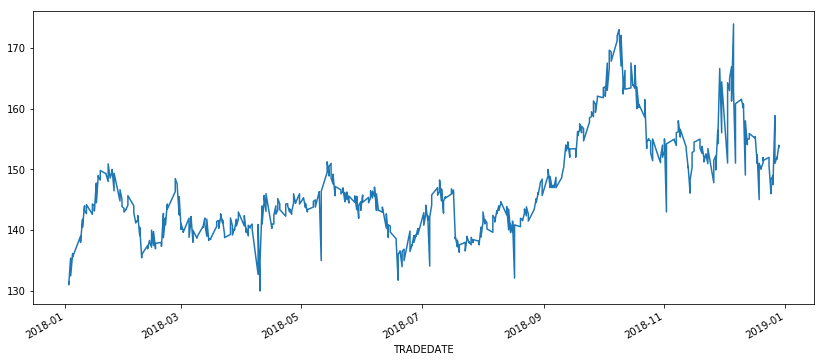

In [28]:
gazp['OPEN'].dropna().plot(figsize = (14, 6))

We can use other data provider, lets try Yahoo finance and Chevron Corporation (CVX) ticker

In [29]:
cvx = pdr.DataReader('CVX',  'yahoo', start=datetime(2018, 1, 1), end=datetime(2019, 1, 1), session=session)

In [30]:
cvx.head()

High         Low        Open       Close     Volume  \
Date                                                                    
2018-01-02  127.739998  125.540001  125.709999  127.580002  5626000.0   
2018-01-03  128.940002  126.900002  127.459999  128.509995  5805500.0   
2018-01-04  128.350006  127.220001  127.949997  128.110001  4598300.0   
2018-01-05  128.100006  127.099998  127.970001  127.900002  4189200.0   
2018-01-08  128.630005  127.629997  127.860001  128.529999  4826100.0   

             Adj Close  
Date                    
2018-01-02  121.618179  
2018-01-03  122.504707  
2018-01-04  122.123413  
2018-01-05  121.923218  
2018-01-08  122.523773

Next, we'll generate a simple chart as a quick visual verification that the data looks correct.  

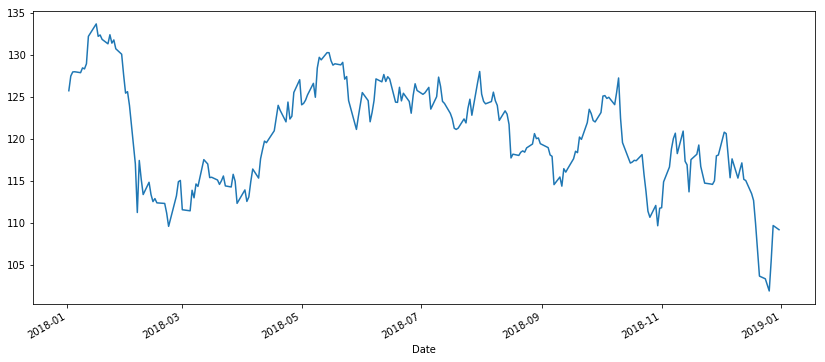

In [31]:
cvx['Open'].plot(figsize = (14, 6))

# Retrive index data
Now we wanna compare stock price with some index 

We will download stock prices for European Energy Companies as listed at https://www.nasdaq.com/screening/companies-by-industry.aspx?industry=Energy&region=Europe

In [32]:
securities = ['BP', 'TOT', 'EQNR', 'SLB', 'E', 'PHG']

sec_data = {}
for security in securities:
    sec_df = pdr.DataReader(security,  
                            'yahoo', 
                            start=datetime(2018, 1, 1), 
                            end=datetime(2019, 1, 1), 
                            session=session)
    sec_data[security] = sec_df['Open']

In [33]:
sec_data.keys()

dict_keys(['BP', 'TOT', 'EQNR', 'SLB', 'E', 'PHG'])

Now we have a dictionary of 6 dataframes, each containing the historical daily average exchange prices.

We can preview TOT Open price to make sure it looks ok.

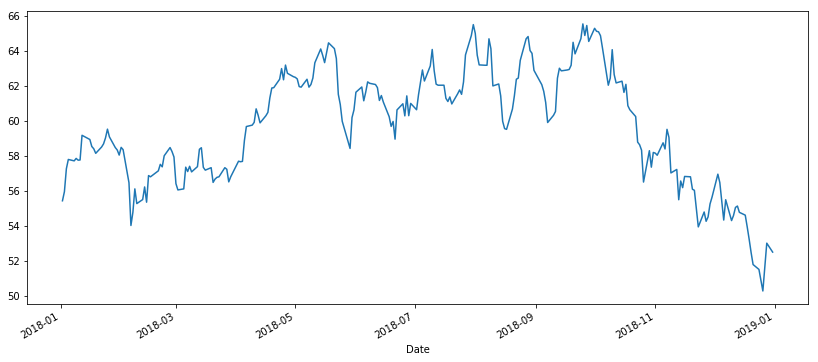

In [34]:
sec_data['TOT'].plot(figsize = (14, 6))

## Correlations in 2018

 Calculate the pearson correlation coefficients for Energy companies in 2018

In [35]:
sec_data_2018 = pd.DataFrame(sec_data)
sec_data_2018.head()

BP        TOT  EQNR        SLB          E        PHG
Date                                                                   
2018-01-02  42.060001  55.450001   NaN  68.070000  33.189999  37.880001
2018-01-03  42.430000  55.970001   NaN  69.970001  33.369999  37.700001
2018-01-04  43.009998  57.279999   NaN  71.760002  34.380001  38.950001
2018-01-05  43.049999  57.810001   NaN  72.949997  34.709999  39.400002
2018-01-08  42.990002  57.730000   NaN  73.349998  34.660000  39.630001

In [36]:
sec_data_2018.pct_change().corr(method='pearson')

BP       TOT      EQNR       SLB         E       PHG
BP    1.000000  0.801044  0.832809  0.630966  0.739382  0.443860
TOT   0.801044  1.000000  0.775889  0.606954  0.790225  0.521720
EQNR  0.832809  0.775889  1.000000  0.660128  0.757535  0.466831
SLB   0.630966  0.606954  0.660128  1.000000  0.623800  0.348697
E     0.739382  0.790225  0.757535  0.623800  1.000000  0.490694
PHG   0.443860  0.521720  0.466831  0.348697  0.490694  1.000000

These correlation coefficients are all over the place.  Coefficients close to 1 or -1 mean that the series' are strongly correlated or inversely correlated respectively, and coefficients close to zero mean that the values tend to fluctuate independently of each other.

## Heatmap Visualization

In [37]:
corr = sec_data_2018.pct_change().corr(method='pearson')
corr.style.background_gradient(cmap='binary', low=0.2, high=0.9)

Here, the dark red values represent stronger correlations (note that each currency is, obviously, strongly correlated with itself), and values with light background represent strong inverse correlations.

In this notebook, we tested pandas_datareader library, got fresh data on stocks of European Energy Companies for 2018 year and visualized the heatmap correlation matrix.